**Исследование объявлений о продаже квартир**


---

Цель проекта: установить параметры для определения рыночной стоимости недвижимости.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



In [ ]:
df = pd.read_csv('.../datasets/real_estate_data.csv', sep='\t')

Изучаем данные: выведем на экран строки ДФ рандомно.


In [ ]:
display(df.sample(30, random_state=1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.00,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,...,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.00,2016-01-17T00:00:00,2,3.00,3.0,27.00,2,False,...,7.40,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.80,2018-02-01T00:00:00,2,2.85,2.0,36.50,2,NaN,...,5.30,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.10,2016-02-19T00:00:00,2,NaN,25.0,43.60,1,NaN,...,11.10,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.00,2017-10-30T00:00:00,2,3.00,12.0,34.00,3,NaN,...,9.00,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
8363,13,5690000.0,41.70,2016-12-29T00:00:00,2,3.20,5.0,23.00,2,NaN,...,7.50,0.0,Санкт-Петербург,23963.0,3530.0,2.0,352.0,3.0,341.0,283.0
15270,15,4999000.0,42.00,2018-11-23T00:00:00,1,2.80,17.0,22.00,4,NaN,...,11.00,2.0,Санкт-Петербург,30571.0,11470.0,1.0,721.0,0.0,NaN,60.0
2143,4,3350000.0,55.50,2017-11-14T00:00:00,2,NaN,5.0,33.50,3,NaN,...,8.50,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,211.0
11284,17,3200000.0,48.00,2017-10-25T00:00:00,1,2.80,9.0,19.00,4,NaN,...,11.50,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,246.0
17095,8,5100000.0,50.20,2018-10-06T00:00:00,2,2.50,3.0,28.00,1,NaN,...,5.40,NaN,Пушкин,12671.0,24825.0,1.0,171.0,0.0,NaN,23.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Мы имеем огромное количество пропущенных значений. Далее поcчитаем их долю.
А метод describe() позволит нам ближе взглянуть на данные, значения которых разбиты на квартили. Здесь видно, какие категории имеют аномальные отклонения, например, высота потолков и количество комнат.
Все значения парков, водоемов, дней, этажей нужно будет привести к целочисленному виду.

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


В этой таблице мы можем наглядно увидеть долю пропущенных значений. Их очень много.
Далее посмотрим на названия столбцов и приведем их к нижнему регистру.


In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Итак, мы познакомились с данными, обнаружили огромное количество пропущенных значений и наличие артефактов. Посмотрим ближе на столбцы с NaN.


**Предобработка данных.**


---



---



Первый столбец, на который следует обратить внимание, ceiling_height. Предположительно, в объявлениях не указывают высоту потолков, потому что хозяева ее не знают, забывают указывать, не считают этот параметр важным или критичным. Но мы имеем целых 38% пропусков в этом столбце, их заполнение приведет к искажению данных, поэтому трогать его не будем.

Небольшое количество пропусков мы имеем в стобцах floors_total и locality_name, поэтому можем от них избавиться:

In [ ]:
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)

Nan в balcony, скорее всего, говорит об отсутствии балкона, поэтому заполним пропущенные значения нулями и приведем к целочисленному типу.

In [ ]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
df['balcony'].isna().sum()

0

Попытаемся понять, как поступить с пропущенными значениями относительно жилой площади. Есть ли связь со студиями, где жилой площадью считается и кухонная.

In [ ]:
df[['living_area']].describe()

,living_area
count,21700.000000
mean,34.454822
std,22.045359
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


In [ ]:
df.query('studio')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    146
living_area       7
dtype: int64

In [ ]:
df['kitchen_area'].isnull().sum()


2222

In [ ]:
df['living_area'].isnull().sum()

1865

Связи нет. Заполянть нулями или средним бессмысленно, ведь вся недвижимость очень разная, ее нельзя свести к некоторой середине, тем более, что нам неизвестно о наличии манипуляций с жилым пространством типа перепланировки. Предположительно, эти пункты остались незаполненными, так как продавец не обладает необходимой информацией (недвижимость в основном продают агентства, а не собственники), поэтому никак обрабатывать эти пропуски не будем.

In [ ]:
df['is_apartment'].value_counts()


False    2710
True       50
Name: is_apartment, dtype: int64

In [ ]:
df['is_apartment'].isnull().sum()

20805

is_apartment - наименее информативный столбец. Апартаменты могут быть новой или непонятной категорией недвижимости на российском рынке, поэтому она не заполнена. Безусловно, во всем ДФ больше апартаментов, чем 50. Но насколько больше- неизвестно, пропуски удалим.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Чтобы понять, как действовать дальше, посмотрим, как все данные коррелируют между собой:

In [ ]:
df.corr().style.background_gradient('coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1,0.105026,0.116969,0.0997594,-0.00186534,0.00982199,0.105551,0.0327806,0.0104023,-0.0282013,-0.0246702,0.106896,0.0468793,-0.00270139,-0.0481035,0.0209548,-0.00601671,-0.0113516,-0.00399529,-0.0273396
last_price,0.105026,1,0.653621,0.363191,0.085401,-0.0067447,0.56638,0.0268418,0.0269813,-0.025084,-0.00880053,0.520362,0.0085685,-0.0262161,-0.206353,0.151492,-0.0165286,0.160735,-0.0858362,0.0808579
total_area,0.116969,0.653621,1,0.758735,0.0954321,-0.0752519,0.939771,-0.0243682,0.0297482,-0.0720005,-0.0349424,0.609248,0.0102434,-0.0304661,-0.231181,0.16589,-0.0212663,0.163757,-0.10014,0.149974
rooms,0.0997594,0.363191,0.758735,1,0.0543783,-0.227913,0.846117,-0.151341,0.000399498,-0.146068,-0.0877353,0.270342,-0.0155419,-0.0609751,-0.184096,0.137806,-0.0537186,0.0935999,-0.0601191,0.126969
ceiling_height,-0.00186534,0.085401,0.0954321,0.0543783,1,-0.0285865,0.0905735,-0.011685,0.154978,0.00168638,0.0427851,0.0877229,0.0313698,-0.0237979,-0.0914835,0.0659917,-0.0193067,0.078297,-0.0594381,0.0190267
floors_total,0.00982199,-0.0067447,-0.0752519,-0.227913,-0.0285865,1,-0.16894,0.67801,-0.026402,0.0702235,0.0508443,0.164803,0.173408,0.108547,0.0187428,-0.25249,0.0976076,-0.122799,0.0400028,-0.0524099
living_area,0.105551,0.56638,0.939771,0.846117,0.0905735,-0.16894,1,-0.0966759,0.0270169,-0.0563066,-0.0337555,0.428909,-0.0147861,-0.0574277,-0.230576,0.184878,-0.0506936,0.149785,-0.0828302,0.142135
floor,0.0327806,0.0268418,-0.0243682,-0.151341,-0.011685,0.67801,-0.0966759,1,-0.0132345,0.0359464,0.0361837,0.136545,0.171507,0.0731295,0.00833603,-0.163601,0.0729881,-0.0762395,0.0264668,-0.0390424
is_apartment,0.0104023,0.0269813,0.0297482,0.000399498,0.154978,-0.026402,0.0270169,-0.0132345,1,-0.00364087,-0.00246226,0.0492241,0.0329443,0.0165081,0.00373368,0.0208231,-0.033553,0.0240973,0.00330326,0.0153367
studio,-0.0282013,-0.025084,-0.0720005,-0.146068,0.00168638,0.0702235,-0.0563066,0.0359464,-0.00364087,1,-0.00421613,nan,0.0300189,-0.0217071,-0.00686397,-0.0308574,0.00692282,0.000812686,0.00183818,-0.0215722


Обратим внимание на жилую площадь. Видим логичную взаимосвязь с общей площадью, площадью кухни и количеством комнат. Также, чем больше площадь квартиры, как жилая, так и общая, тем выше цена продажи недвижимости.

Сделаем коэффициенты жилой площади от общей и площади кухни от общей. Для этого создадим словари медианных коэффициентов для каждой комнаты и заменим ими Nan.

In [ ]:
df['liv_coef'] = df['living_area']/df['total_area']
df['kit_coef'] = df['kitchen_area']/df['total_area']
df. head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_coef,kit_coef
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


In [ ]:
df['living_area'] = df['living_area'].fillna((df['rooms'].map(df.groupby(
    'rooms')['liv_coef'].median().to_dict()))*df['total_area'])

df['kitchen_area'] = df['kitchen_area'].fillna((df['rooms'].map(df.groupby(
    'rooms')['kit_coef'].median().to_dict()))*df['total_area'])


В том месте, где были пропуски по кухням (кухни отсутсвуют в студиях), еще остались Nan, заполним их нулями и проверим, что получилось.

In [ ]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.55
floors_total,0
living_area,0
floor,0
is_apartment,0


Всё заполнено, с days_exposition поработаем позже. Поэтому идем дальше.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_coef,kit_coef
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,100.461415,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


Так как в столбце first_day_exposition не указано время, мы привели его к формату даты без времени.

13,42% данных в столбце days_exposition остальсь незаполненными. Вероятно, это произошло потому, что продавец просле продажи не счел необходимым/забыл закрыть объявление. Либо какие-то объекты недвижимости остались непроданными по причине наличия каких-то серьезных проблем. Мы могли бы заполнить эти пропуски медианами, но если мы действительно имеем дело с проблемами (очень плохое состояние, рядом стройка или свалка) и забывчивостью продавцов, то это не имеет смысла.

23,28% данных отсутствуют в столбцах parks_around3000 и ponds_around3000. Судя по тому, что у двух похожих по содержанию столбцах отсутствует абсолютно одинаковое количество данных, эти параметры заполняются автоматически системой геолокации. Это означает, что парки и водоемы отсутствуют в радиусе 3 км. Заполнять будем нулями - ноль парков и водоемов находится в радиусе 3 км. 

In [ ]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_around3000'].isna().sum()

0

In [ ]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_around3000'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
citycenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-null float64
ponds_around

Также мы видим, что столбцы cityсenters_nearest и airports_nearest не заполнены на 23%, это примерно по 5500 пропкусков. Проверим, сколько именно пропусков совпадает по этим столбцам.

In [ ]:
df.query('airports_nearest != airports_nearest and citycenters_nearest != citycenters_nearest').shape[0]

5500

Почти полное совпадение, значит, это снова сбой системы при заполнении данных, будем работать с тем, что есть.
Осталось посмотреть на стобец locality_name.

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что названия здесь дублируются в зависимости от наличия буквы ё. Избавимся от этого.

In [ ]:
len(df['locality_name'].unique())

364

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [ ]:
len(df['locality_name'].unique())

330

In [ ]:
df.duplicated().sum()

0

Логичным было бы floors_total, days_exposition привести к целочисленному виду, так как дни и этажи - это целое число, но мы не обрабатывали в них пропуски, и не преследуем цель экономии места. Округлим и приведем к целому те данные, которые будем анализировать в следующем шаге.

In [ ]:
df['total_area']=round(df['total_area'],1)
df['rooms']=df['rooms'].astype('int')
df['last_price']=df['last_price'].astype('int')
df['citycenters_nearest'] = df['citycenters_nearest']/1000
df['citycenters_nearest'] = df['citycenters_nearest'].fillna(9999)
df['citycenters_nearest'] = df['citycenters_nearest'].astype('int')
df


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_coef,kit_coef
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16,1,482.0,2,755.0,NaN,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,поселок Шушары,12817.0,18,0,NaN,0,NaN,81.0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13,1,90.0,2,574.0,558.0,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,100.461415,9,False,...,Санкт-Петербург,28098.0,6,2,84.0,3,234.0,424.0,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8,2,112.0,1,48.0,121.0,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.8,2017-03-21,3,3.70,5.0,73.300000,3,False,...,Санкт-Петербург,24665.0,4,1,796.0,3,381.0,NaN,0.547792,0.103356
23695,14,3100000,59.0,2018-01-15,3,NaN,5.0,38.000000,4,False,...,Тосно,NaN,9999,0,NaN,0,NaN,45.0,0.644068,0.144068
23696,18,2500000,56.7,2018-02-11,2,NaN,3.0,29.700000,1,False,...,село Рождествено,NaN,9999,0,NaN,0,NaN,NaN,0.523810,NaN
23697,13,11475000,76.8,2017-03-28,2,3.00,17.0,44.934829,12,False,...,Санкт-Петербург,39140.0,10,2,173.0,3,196.0,602.0,NaN,0.303583


Таким образом, в нашем исследовании мы столкнулись с большим количеством пропущенных значений. По нашим предположениям имело место их отсутствие по причине незаполнения некоторых категорий продавцами еще на этапе размещения объявления о продаже недвижимости. Например, продавец может не обладать информацией о высоте потолков, жилой площади, или не знает, что такое апартаменты (не считает важным заполнять это поле). Также он мог забыть закрыть объявление после сделки. Эти факторы мы можем отнести к человеческим. 
Что касается машинных ошибок, то мы выявили закономерность: отсутствует одинаковое количество данных, связанных с геолокацией. Это может говорить об ошибке в выгрузке или системном сбое. Возможно, у 23% продавцов было отключено геопозиционирование, и координат попросту нет. 

 

**Посчитаем и добавим в таблицу:**

---



---



Цену квадратного метра:

In [ ]:
df['sqm_price'] = round(df['last_price'] / df['total_area'],2)


День недели, месяц и год публикации объявления:

In [ ]:
df['exposition_day'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year


Этаж квартиры; варианты — первый, последний, другой:


In [ ]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
df['floor_status'] = df.apply(floor_status, axis=1)

Cоотношение жилой и общей площади, а также отношение площади кухни к общей:

In [ ]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

In [ ]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

На данном этапе мы добавили в датафрейм полезных для дальнейшей обработки данных. Когда необходимо будет проводить анализ стоимости недвидимости относительно цены за квадратный метр, то этот параметр уже есть.




**Исследовательский анализ данных** 




---



---

Изучим параметры: площадь, цена, число комнат, высота потолков.

count    23565.000000
mean        60.322813
std         35.657072
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

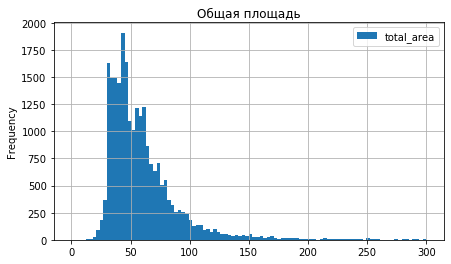

In [ ]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,4), range = (0,300))
plt.title('Общая площадь')

df['total_area'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

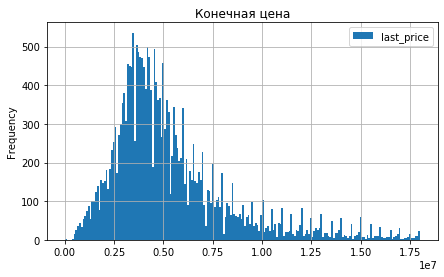

In [ ]:
df.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (7,4), range = (0,1.800000e+07))
plt.title('Конечная цена')

df['last_price'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

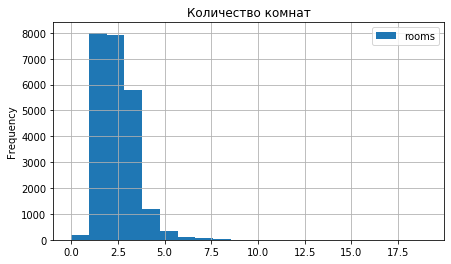

In [ ]:
df.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (7,4), range = (0,19))
plt.title('Количество комнат')

df['rooms'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

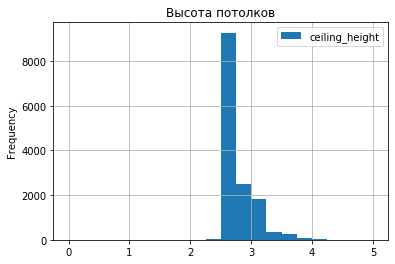

In [ ]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (6,4), range = (0,5))
plt.title('Высота потолков')

df['ceiling_height'].describe()

In [ ]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,14481.000000
mean,60.322813,6.540058e+06,2.070656,2.771283
std,35.657072,1.091093e+07,1.078591,1.261983
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.510000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Таким образом, профиль средней квартиры, выставленной на продажу в Петербурге и Ленобласти:
общая площадь - 52 кв.м., стоимость 4,6 млн.руб., 2 комнаты, высота потолков 2,65 м.Больше всего недвижимости выставлено на продажу площадью 45 кв.м., стоимостью 4-5 млн.руб.,однокомнтаной, с высотой потолков 2,5-2,7 м.
Аномальные значения присутствуют в каждом разделе данных: площадь 900 кв.м., цена 12190 руб или 763 млн.руб. (хотя 900 кв.м. могли бы столько стоить), 19 комнат, 1 м. или 100 м. высота потолков.


**Изучим время продажи квартиры.** 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

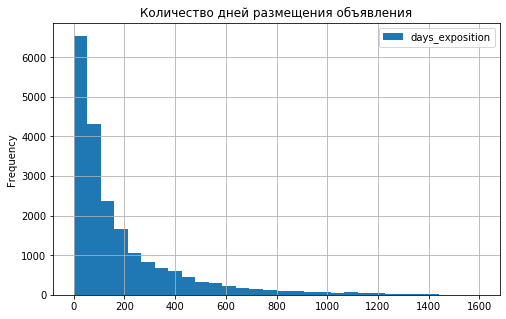

In [ ]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (8,5), range = (0,1600))
plt.title('Количество дней размещения объявления')
df['days_exposition'].describe()

Среднее время продажи недвижимости составляет 95 дней. 3 месяца звучит правдоаодобно. Как было отмечено выше, максимальный срок, 4,3 года, может быть связан с тем, что после продажи на сайте не сняли объявление, либо с такими квартирами что-то не в порядке. Конечно, может быть и такое, что "не такую" квартиру никто не захотел покупать. Например, она сильно разбита или продавец указал надекватно высокую цену. Необычно быстрая продажа составляет 1 день. Считаем, что объявление по различным причинам может провисеть на сайте так недолго, даже если это такое скоростное заключение сделки. Основная масса объявлений закрывается в течении 200 дней. 

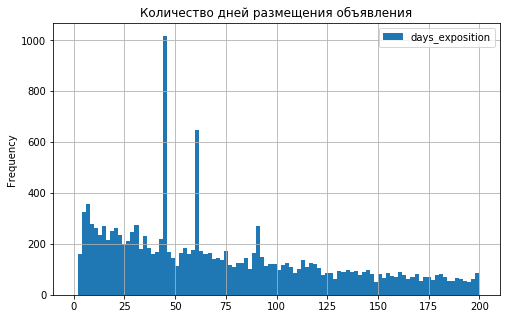

In [ ]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (8,5), range = (0,200))
plt.title('Количество дней размещения объявления')
plt.show()

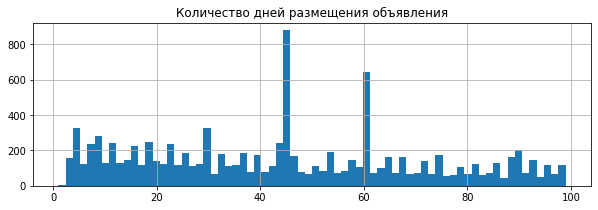

In [ ]:
df.query('0<days_exposition<100')['days_exposition'].hist(bins=70, figsize=(10,3))
plt.title('Количество дней размещения объявления')
plt.show()


При более пристальном рассмотрении значений времени снятия объявлений видна некоторая закономерность: 45, 60, 7 и 30 дней. Это связано с имеющимися на сервисе Яндекс.Недвижимость сроками публикации и продвижения объявлений, но это касается 7 и 30 дней. Так как у нас шаг в 15 дней, мы можем продположить, что клиент сервиса раз в 2 недели получает уведлмления, что надо закрыть объявление или продлить оплату, либо стоимость размещения объявлений растет после 45 или 60 дней с момента начала продажи.

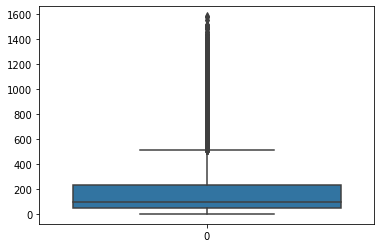

In [ ]:
sns.boxplot(data=df['days_exposition'])
plt.show()

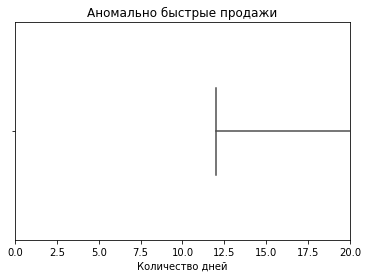

In [ ]:
sns.boxplot(df['total_area'], color='blue')
plt.title('Аномально быстрые продажи')
plt.xlabel('Количество дней')
plt.xlim(0, 20)
plt.show()

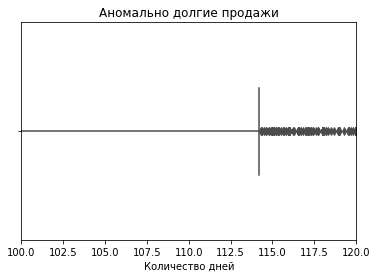

In [ ]:
sns.boxplot(df['total_area'], color='blue')
plt.title('Аномально долгие продажи')
plt.xlabel('Количество дней')
plt.xlim(100, 120)
plt.show()

Аномально быстрая продажа - менее 12 дней. Аномально долгая - выше 114 дней. 

Таким образом, среднее время продажи недвижимости составляет 95 дней, нормальным временем продажи считается от 12 до 114 дней.

**Обработаем аномальные значения.**

Масштабируем график для last_price, чтобы увидеть "усы"

In [ ]:
last_price_cut = df.loc[(df['last_price'] >= df['last_price'].quantile(.05))&(
    df['last_price'] <= df['last_price'].quantile(.95)), 'last_price']

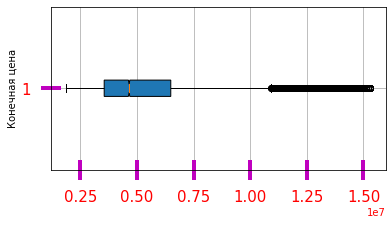

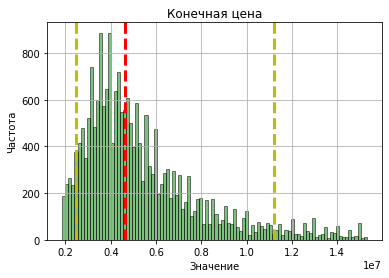

In [ ]:
plt.figure(figsize =(6, 3))
plt.boxplot(last_price_cut, 
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
plt.ylabel('Конечная цена')
plt.tick_params(axis = 'both',    
               which = 'major',    
               direction = 'inout',    
               length = 20,   
               width = 4,   
               color = 'm',   
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'r'  
             )   

plt.grid()
plt.show()

plt.figure(figsize =(6, 4))

hist = last_price_cut.plot(
                kind='hist', 
                bins=100, 
                alpha=0.5, 
                ec='black',
                color='green',
                )
plt.axvline(x=last_price_cut.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.axvline(x=last_price_cut.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.axvline(x=last_price_cut.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.title('Конечная цена')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
plt.show()

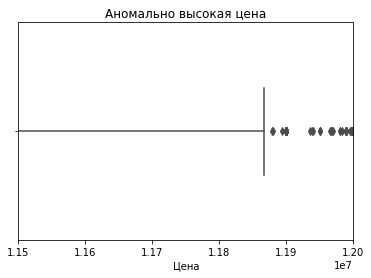

In [ ]:
sns.boxplot(df['last_price'], color='blue')
plt.title('Аномально высокая цена')
plt.xlabel('Цена')
plt.xlim(1.150000e+07, 1.200000e+07)
plt.show()

На графиках видно, от каких значений нужно избавится. Отрежем их, но сначала сдедаем копию ДФ. Дальше обрезанные данные будем записывать туда для дальнейшего анализа.

In [ ]:
df1 = df.copy()
df1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,liv_coef,kit_coef,sqm_price,exposition_day,exposition_month,exposition_year,floor_status,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,NaN,0.472222,0.231481,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,81.0,0.460396,0.272277,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,558.0,0.612500,0.148214,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,100.461415,9,False,...,424.0,NaN,NaN,408176.10,4,7,2015,другой,0.631833,0.128496
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,121.0,0.320000,0.410000,100000.00,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.8,2017-03-21,3,3.70,5.0,73.300000,3,False,...,NaN,0.547792,0.103356,72496.26,1,3,2017,другой,0.547833,0.103363
23695,14,3100000,59.0,2018-01-15,3,NaN,5.0,38.000000,4,False,...,45.0,0.644068,0.144068,52542.37,0,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.7,2018-02-11,2,NaN,3.0,29.700000,1,False,...,NaN,0.523810,NaN,44091.71,6,2,2018,первый,0.523810,0.161034
23697,13,11475000,76.8,2017-03-28,2,3.00,17.0,44.934829,12,False,...,602.0,NaN,0.303583,149414.06,1,3,2017,другой,0.585089,0.303385


In [ ]:
df1 = df1[df1['last_price'] <= 118700000]


Проделаем то же самое для оставшихся столбцов:

In [ ]:
total_area_cut = df.loc[(df['total_area'] >= df['total_area'].quantile(.05))&(
    df['total_area'] <= df['total_area'].quantile(.95)), 'total_area']

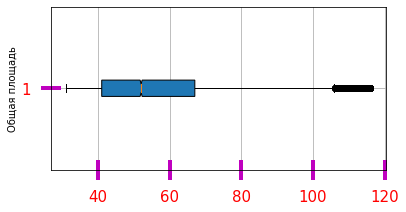

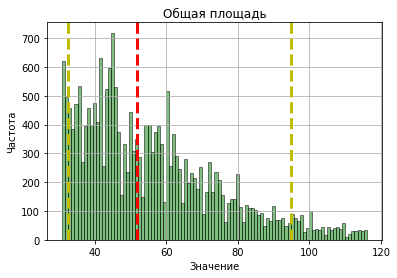

In [ ]:
plt.figure(figsize =(6, 3))
plt.boxplot(total_area_cut, 
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
plt.ylabel('Общая площадь')
plt.tick_params(axis = 'both',    
               which = 'major',    
               direction = 'inout',    
               length = 20,   
               width = 4,   
               color = 'm',   
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'r'  
             )   

plt.grid()
plt.show()

plt.figure(figsize =(6, 4))

hist = total_area_cut.plot(
                kind='hist', 
                bins=100, 
                alpha=0.5, 
                ec='black',
                color='green',
                )
plt.axvline(x=total_area_cut.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.axvline(x=total_area_cut.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.axvline(x=total_area_cut.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.title('Общая площадь')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
plt.show()

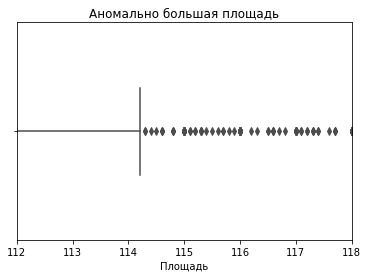

In [ ]:
sns.boxplot(df['total_area'], color='blue')
plt.title('Аномально большая площадь')
plt.xlabel('Площадь')
plt.xlim(112, 118)
plt.show()

In [ ]:
df1 = df1[df1['total_area'] <= 114.0]


In [ ]:
rooms_cut = df.loc[(df['rooms'] >= df['rooms'].quantile(.001))&(
    df['rooms'] <= df['rooms'].quantile(.999)), 'rooms']

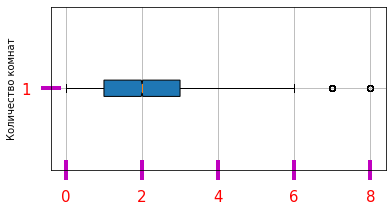

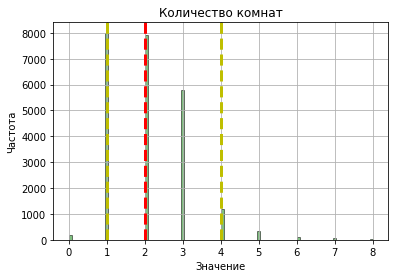

In [ ]:
plt.figure(figsize =(6, 3))
plt.boxplot(rooms_cut, 
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
plt.ylabel('Количество комнат')
plt.tick_params(axis = 'both',    
               which = 'major',    
               direction = 'inout',    
               length = 20,   
               width = 4,   
               color = 'm',   
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'r'  
             )   

plt.grid()
plt.show()

plt.figure(figsize =(6, 4))

hist = rooms_cut.plot(
                kind='hist', 
                bins=100, 
                alpha=0.5, 
                ec='black',
                color='green',
                )
plt.axvline(x=rooms_cut.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.axvline(x=rooms_cut.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.axvline(x=rooms_cut.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.title('Количество комнат')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
plt.show()

In [ ]:
df1 = df1[df1['rooms'] <= 6]


In [ ]:
ceiling_height_cut = df.loc[(df['ceiling_height'] >= df['ceiling_height'].quantile(.001))&(
    df['ceiling_height'] <= df['ceiling_height'].quantile(.95)), 'ceiling_height']

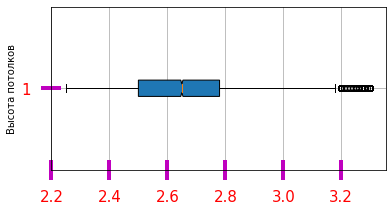

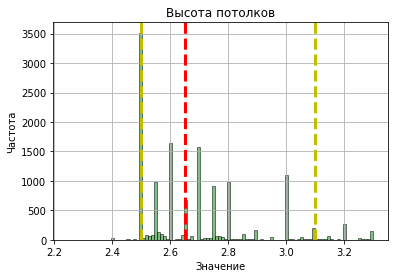

In [ ]:
plt.figure(figsize =(6, 3))
plt.boxplot(ceiling_height_cut, 
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
plt.ylabel('Высота потолков')
plt.tick_params(axis = 'both',    
               which = 'major',    
               direction = 'inout',    
               length = 20,   
               width = 4,   
               color = 'm',   
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'r'  
             )   

plt.grid()
plt.show()

plt.figure(figsize =(6, 4))

hist = ceiling_height_cut.plot(
                kind='hist', 
                bins=100, 
                alpha=0.5, 
                ec='black',
                color='green',
                )
plt.axvline(x=ceiling_height_cut.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.axvline(x=ceiling_height_cut.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.axvline(x=ceiling_height_cut.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.title('Высота потолков')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
plt.show()

In [ ]:
df1 = df1[df1['ceiling_height'] <= 3.20]


Итак, мы обнаружили и избавились от следующих аномалий:

-цены на недвижимость выше 11млн. 870 тыс. руб.,

-общей площади выше 114 кв.м.,

-больше 6 комнат,

-потолков выше 3, 2 м.

Теперь чистые данные пригодны к дальнейшему анализу.

**Проанализируем, какие факторы больше всего влияют на стоимость квартиры.**

Снова посмотрим на то, как наши уже очищенные данные коррелируют между собой:

In [ ]:
df1.corr().style.background_gradient('coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_coef,kit_coef,sqm_price,exposition_day,exposition_month,exposition_year,living_area_ratio,kitchen_area_ratio
total_images,1,0.164217,0.130159,0.0923944,0.0258002,0.0429507,0.105623,0.051832,0.0176678,-0.0285175,-0.0131239,0.0955459,0.0545212,0.00208529,-0.050708,0.0209134,0.00283368,-0.00154602,0.00307819,-0.0456503,0.00104143,-0.0199747,0.130276,-0.00894118,-0.0032001,0.14192,0.00480418,-0.0172348
last_price,0.164217,1,0.693901,0.384221,0.465867,0.181323,0.55445,0.135654,0.0349975,-0.049705,-0.0201383,0.540053,0.0643073,-0.0265392,-0.380027,0.251615,0.0593236,0.283929,-0.101853,0.0735516,-0.0180158,-0.0367884,0.74668,-0.02677,-0.00680229,0.00217616,-0.00567433,-0.0413025
total_area,0.130159,0.693901,1,0.785058,0.357674,0.0339213,0.909285,0.019051,0.0176378,-0.103807,-0.0292266,0.494776,0.0872785,-0.015679,-0.110195,0.111376,0.0314568,0.136065,-0.0735821,0.12752,0.22084,-0.358181,0.103427,-0.0215003,0.00684299,-0.0699941,0.235407,-0.34298
rooms,0.0923944,0.384221,0.785058,1,0.07908,-0.193181,0.882036,-0.1481,-0.0132216,-0.160131,-0.0416783,0.0934942,0.0167052,-0.0397291,-0.0539679,0.0644293,-0.0220846,0.0486251,-0.0329989,0.0927723,0.573098,-0.636059,-0.131103,0.000240557,0.00176844,-0.0326893,0.582275,-0.592087
ceiling_height,0.0258002,0.465867,0.357674,0.07908,1,0.0747951,0.245796,0.0524665,0.060999,0.0283192,0.0110677,0.381566,-0.00372022,-0.080761,-0.129452,0.200528,-0.034131,0.209416,-0.105073,0.0852735,-0.134617,0.135871,0.361469,-0.0158579,-0.0079864,-0.0766057,-0.12965,0.120866
floors_total,0.0429507,0.181323,0.0339213,-0.193181,0.0747951,1,-0.120413,0.668724,-0.0199005,0.061101,0.0223971,0.288242,0.199769,0.0944232,-0.174661,-0.112992,0.0884512,-0.0233118,0.0405101,-0.0422893,-0.38225,0.354037,0.290698,-0.00637055,0.015115,-0.0133542,-0.3729,0.326226
living_area,0.105623,0.55445,0.909285,0.882036,0.245796,-0.120413,1,-0.0924816,0.00843674,-0.0686711,-0.01884,0.202183,0.0417715,-0.0393427,-0.0882726,0.112417,-0.0113435,0.10225,-0.0530666,0.108514,0.59315,-0.589357,-0.0112851,-0.0111816,0.00133691,-0.0517848,0.596671,-0.56839
floor,0.051832,0.135654,0.019051,-0.1481,0.0524665,0.668724,-0.0924816,1,-0.00744235,0.0346462,0.0179619,0.203445,0.193596,0.065713,-0.106101,-0.0771277,0.0623612,-0.0108211,0.0266022,-0.0294053,-0.275903,0.251842,0.214289,0.00607659,0.015075,-0.00528153,-0.270178,0.235408
is_apartment,0.0176678,0.0349975,0.0176378,-0.0132216,0.060999,-0.0199005,0.00843674,-0.00744235,1,-0.00358533,-0.00145025,0.0425467,0.0409821,0.0269572,-0.0138308,-0.000826866,-0.0273903,0.0100612,0.0199252,-0.00110177,-0.0139319,0.0285072,0.0300263,-0.00203426,-0.00287045,0.0156098,-0.0125259,0.0261039
studio,-0.0285175,-0.049705,-0.103807,-0.160131,0.0283192,0.061101,-0.0686711,0.0346462,-0.00358533,1,-0.002266,-0.158608,0.0220651,-0.0195848,0.0171515,-0.0307213,-0.000585237,-0.0042214,0.0022057,-0.00921205,0.0897202,nan,0.0315493,0.00158758,0.00568267,-0.00744658,0.0907676,-0.178649


Видно, что теперь конечная цена зависит от высоты потолков, жилой площади и площади кухни. Но больше всего от общей площади. Такая картина выглядит более логично!

In [ ]:
df1.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,liv_coef,kit_coef,sqm_price,exposition_day,exposition_month,exposition_year,floor_status,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,NaN,0.472222,0.231481,120370.37,3,3,2019,другой,0.472222,0.231481
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,0.320000,0.410000,100000.00,1,6,2018,другой,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,289.0,0.714754,0.106557,88524.59,6,2,2017,другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,137.0,0.512626,0.214646,127525.25,3,11,2017,другой,0.512626,0.214646
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,366.0,0.630841,0.121495,82943.93,5,7,2017,последний,0.630841,0.121495


In [ ]:
corr = df1[['sqm_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()
corr.style.background_gradient(cmap='coolwarm')

,sqm_price,total_area,rooms,citycenters_nearest
sqm_price,1,0.103427,-0.131103,-0.534444
total_area,0.103427,1,0.785058,-0.110195
rooms,-0.131103,0.785058,1,-0.0539679
citycenters_nearest,-0.534444,-0.110195,-0.0539679,1


In [ ]:
corr = df1[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,citycenters_nearest
last_price,1,0.693901,0.384221,-0.380027
total_area,0.693901,1,0.785058,-0.110195
rooms,0.384221,0.785058,1,-0.0539679
citycenters_nearest,-0.380027,-0.110195,-0.0539679,1


Есть интересная зависимость между ценой за квадратный метр и отдаленностью от центра Петербурга: чем дальше от центра, тем дороже. Скорее всего, так получается потому, что существуют элитные загородные районы.

Есть низкая корреляция между количеством комнат и конечной ценой на недвижимость.
Конечная цена зависит от общей площади недвижимости: чем больше площадь, тем выше цена.

,mean,median
,last_price,last_price
floor_status,,
другой,5.601884e+06,4800000
первый,4.376287e+06,3900000
последний,4.887997e+06,4200000


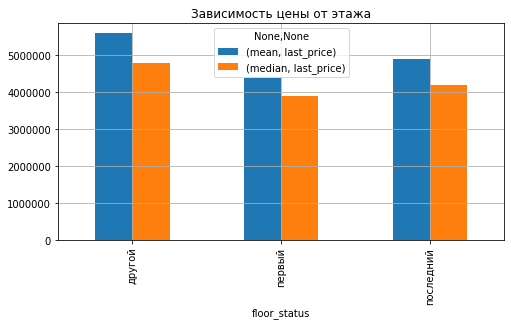

In [ ]:
pt_floor_price = df1.pivot_table(index = 'floor_status', values = 'last_price', aggfunc = ['mean', 'median'])
pt_floor_price.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены от этажа')
pt_floor_price

Выше всего цена квартиры на другом этаже, ниже всего - на первом. Последний этаж имеет среднюю цену.

,median,mean
,last_price,last_price
exposition_day,,
0,4600000,5.405931e+06
1,4800000,5.501186e+06
2,4590000,5.308624e+06
3,4550000,5.355980e+06
4,4550000,5.286320e+06
5,4500000,5.199360e+06
6,4550000,5.148870e+06


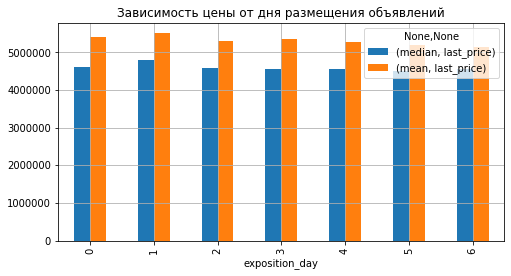

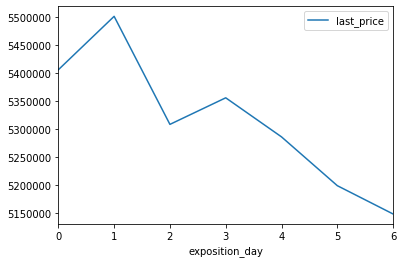

In [ ]:
pt_exposition_day = df1.pivot_table(index = 'exposition_day', values = 'last_price', aggfunc = ['median', 'mean'])
pt_exposition_day.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены от дня размещения объявлений')
pt_exposition_day.plot(y = 'mean')
pt_exposition_day

,median,mean
,last_price,last_price
exposition_month,,
1,4600000,5.456677e+06
2,4700000,5.411529e+06
3,4500000,5.206184e+06
4,4800000,5.532065e+06
5,4500000,5.165953e+06
6,4390000,5.141935e+06
7,4600000,5.352178e+06
8,4600000,5.447812e+06


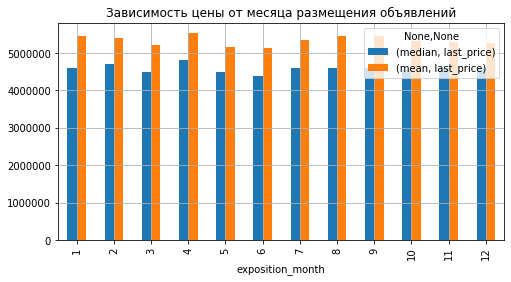

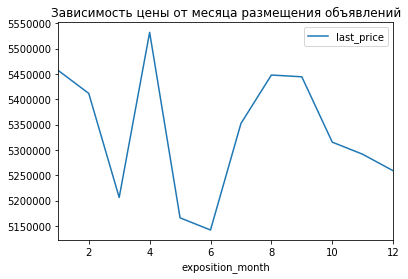

In [ ]:
pt_exposition_month = df1.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = ['median', 'mean'])
pt_exposition_month.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены от месяца размещения объявлений')
pt_exposition_month.plot(y = 'mean')
plt.title('Зависимость цены от месяца размещения объявлений')
pt_exposition_month


,median,mean
,last_price,last_price
exposition_year,,
2014,6200000,6.988245e+06
2015,4999500,5.686823e+06
2016,4500000,5.354709e+06
2017,4499000,5.272446e+06
2018,4550000,5.219275e+06
2019,5000000,5.686067e+06


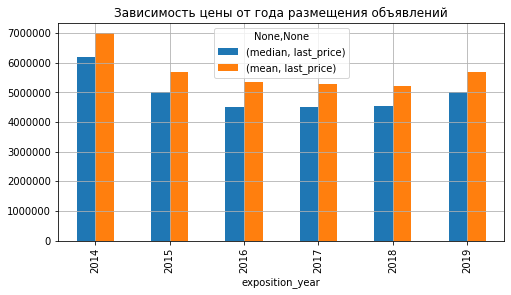

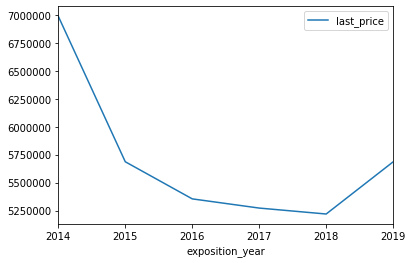

In [ ]:
pt_exposition_year = df1.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['median', 'mean'])
pt_exposition_year.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены от года размещения объявлений')
pt_exposition_year.plot(y = 'mean')
pt_exposition_year

По городу и области существует зависимость цены недвижимости от даты размещения объявления: дня недели, месяца и года. Самая дорогая недвижимость размещается во вторник (в целом выше в рабочие дни), в апреле (перед сезоном отпусков). Самые низкие цены наблюдаются по воскресеньям (за неделю не удалось продать, либо самые серьезные сделки не делаются в выходные), в июне. К весне, после новогодних и гендерных праздников деловая активность на рынке обычно поднимается. Новое снижение количества сделок происходит во время майских праздников и продолжается до лета. Мы видим всплески цен в августе и сентябре.  В 2014 году мы наблюдаем самые высокие цены. С 2015 до 2018 цены снижались, и в 2018 достигли минимума.



**Выберем 10 населённых пунктов с наибольшим числом объявлений, с самой высокой и низкой стоимостью жилья.**

In [ ]:
locality = df.groupby('locality_name')['sqm_price'].agg(['count', 'median']).sort_values('count', ascending = False).head(10)
locality 


,count,median
locality_name,,
Санкт-Петербург,15651,104774.540
поселок Мурино,552,86071.050
поселок Шушары,439,76829.270
Всеволожск,398,65789.470
Пушкин,369,100000.000
Колпино,338,74723.745
поселок Парголово,327,91642.860
Гатчина,307,67796.610
деревня Кудрово,299,91860.470


In [ ]:
locality[locality['median']==locality['median'].max()]



,count,median
locality_name,,
Санкт-Петербург,15651,104774.54


In [ ]:
locality[locality['median']==locality['median'].min()]

,count,median
locality_name,,
Выборг,237,58158.32


Максимальную стоимость квадратного метра жилья мы наблюдаем в Петербурге (104761.9 руб.), минимальную - в Выборге (58158.32 руб.)

Найдем зависимость цены от удалённости от центра Санкт-Петербурга.

,sqm_price
citycenters_nearest,
0,138536.995
1,123966.940
2,116363.640
3,110080.010
4,125980.420
5,125920.620
6,134117.295
7,125000.000
8,114035.090


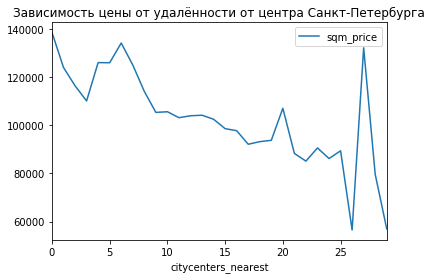

In [ ]:
centre_price = df.query('locality_name == "Санкт-Петербург" and citycenters_nearest !=9999').pivot_table(index='citycenters_nearest', values='sqm_price', aggfunc='median')
centre_price.plot()
plt.title('Зависимость цены от удалённости от центра Санкт-Петербурга')
centre_price

Самая дорогая недвижимость находится в радиусе 7 км. от центра. Есть также всплески цены за квадратный метр в радиусе 20 и 27 км. Очевидно, что это элитные загородные районы.

**Выделим сегмент квартир в центре.**

In [ ]:
center_real_estate = df.query('citycenters_nearest <= 7 and locality_name == "Санкт-Петербург"')
print(center_real_estate.shape[0], 'квартир в центре Петербурга')


3705 квартир в центре Петербурга


In [ ]:
df1[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,13104.000000,1.310400e+04,13104.000000,13104.000000
mean,54.496368,5.344638e+06,1.979930,2.668099
std,19.039870,3.218662e+06,0.893459,0.178453
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.480000e+06,1.000000,2.500000
50%,50.700000,4.600000e+06,2.000000,2.600000
75%,65.600000,6.300000e+06,3.000000,2.750000
max,114.000000,5.300000e+07,6.000000,3.200000


count    3705.000000
mean       92.245830
std        60.491109
min        12.000000
25%        56.000000
50%        77.700000
75%       108.600000
max       900.000000
Name: total_area, dtype: float64

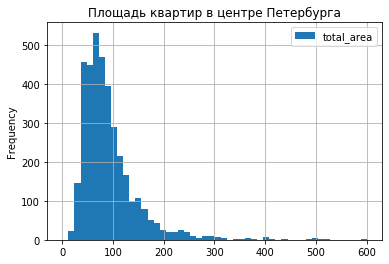

In [ ]:
center_real_estate.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (6,4), range = (0,600))
plt.title('Площадь квартир в центре Петербурга')
center_real_estate['total_area'].describe()

Большинство квартир в центре имеют площадь от 56 до 108 кв.м. Средняя общая площадь - 77 кв.м. По городу и области этот показатель составляет 50 кв.м.

count    3.705000e+03
mean     1.472224e+07
std      2.472347e+07
min      1.600000e+06
25%      6.590000e+06
50%      9.000000e+06
75%      1.410000e+07
max      7.630000e+08
Name: last_price, dtype: float64

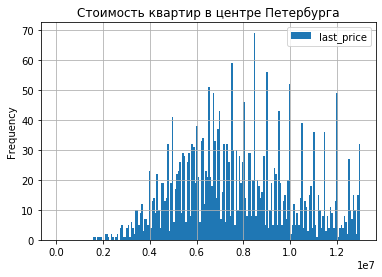

In [ ]:
center_real_estate.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (6,4), range = (0,1.300000e+07))
plt.title('Стоимость квартир в центре Петербурга')
center_real_estate['last_price'].describe()

Большинство квартир в центре имеют цену от 6,5 млн.руб до 14 млн.руб. Средняя цена - 9 млн.руб. По городу и области этот показатель составляет 4,6 млн.руб.

count    3705.000000
mean        2.812686
std         1.456719
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

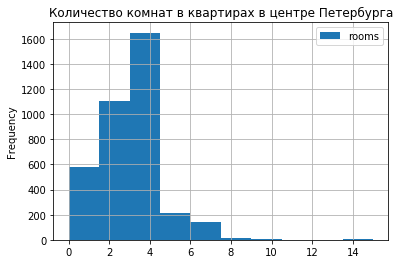

In [ ]:
center_real_estate.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (6,4), range = (0,15))
plt.title('Количество комнат в квартирах в центре Петербурга')
center_real_estate['rooms'].describe()

Большинство квартир в центре имеют 2-3 комнаты. Средняя количество комнат - 3. По городу и области этот показатель составляет 2 комнаты.

count    2407.000000
mean        3.102671
std         0.854880
min         2.000000
25%         2.800000
50%         3.000000
75%         3.280000
max        32.000000
Name: ceiling_height, dtype: float64

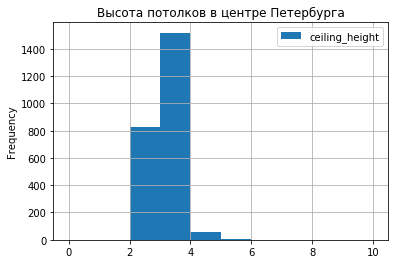

In [ ]:
center_real_estate.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (6,4), range = (0,10))
plt.title('Высота потолков в центре Петербурга')
center_real_estate['ceiling_height'].describe()

Большинство квартир в центре имеют высоту потолков 2,65 - 3,1 м. Средняя высота потолков - 2,8 м. По городу и области этот показатель составляет 2,6 м.

Таким образом, недвижимость в центре Санкт-Петербурга превосходит недвижимость в остальной части города и области по всем указанным параметрам: по конечной цене в 1,9 раз, по площади в 1,4 раза, по количеству комнат в 1,5 раз, по высоте потолков в 1,05 раз. 

In [ ]:
corr_center = center_real_estate[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()
corr_center.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,citycenters_nearest
last_price,1,0.636563,0.333293,-0.0522017
total_area,0.636563,1,0.737542,-0.112168
rooms,0.333293,0.737542,1,-0.181027
citycenters_nearest,-0.0522017,-0.112168,-0.181027,1


In [ ]:
corr_center = center_real_estate[['sqm_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()
corr_center.style.background_gradient(cmap='coolwarm')

,sqm_price,total_area,rooms,citycenters_nearest
sqm_price,1,0.25186,0.00643243,-0.0311308
total_area,0.25186,1,0.737542,-0.112168
rooms,0.00643243,0.737542,1,-0.181027
citycenters_nearest,-0.0311308,-0.112168,-0.181027,1


Показатели корреляции говорят о том, что существует зависимость между стоимостью квартиры в центре и общей площадью, но стоимость квадратного метра в центре не зависит от площади, количества комнат и высоты потолков.

,mean,median
,sqm_price,sqm_price
floor_status,,
другой,147821.070045,127486.04
первый,122402.089459,108653.85
последний,144361.968819,116873.16


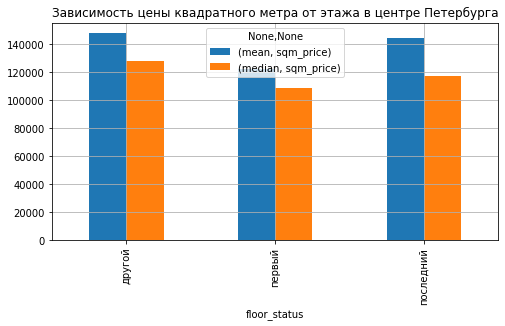

In [ ]:
pt_floor_center = center_real_estate.pivot_table(index = 'floor_status', values = 'sqm_price', aggfunc = ['mean', 'median'])
pt_floor_center.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены квадратного метра от этажа в центре Петербурга')
pt_floor_center



,mean,median
,last_price,last_price
floor_status,,
другой,1.456834e+07,9500000
первый,9.167233e+06,6550000
последний,1.881441e+07,9175000


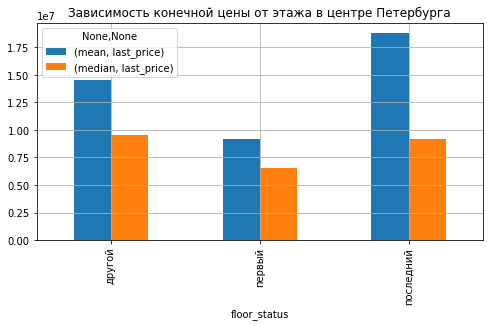

In [ ]:
pt_floor_center = center_real_estate.pivot_table(index = 'floor_status', values = 'last_price', aggfunc = ['mean', 'median'])
pt_floor_center.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость конечной цены от этажа в центре Петербурга')
pt_floor_center

Квартиры на первом этаже имеют самую низкую конечную стоимость, на последнем - самую высокую.Но если смотреть на цену квадратного метра, то самые дорогие квартиры на другом этаже.

,median,mean
,last_price,last_price
exposition_day,,
0,9325000,1.444047e+07
1,9000000,1.394431e+07
2,9190000,1.475535e+07
3,9225000,1.431389e+07
4,8990000,1.423369e+07
5,8525000,1.889688e+07
6,9200000,1.503551e+07


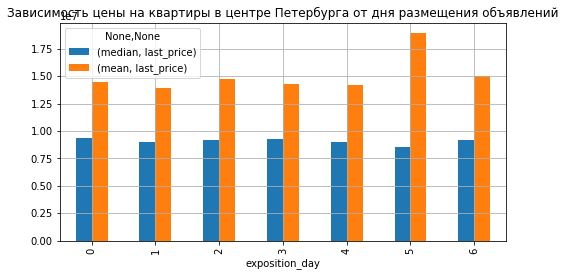

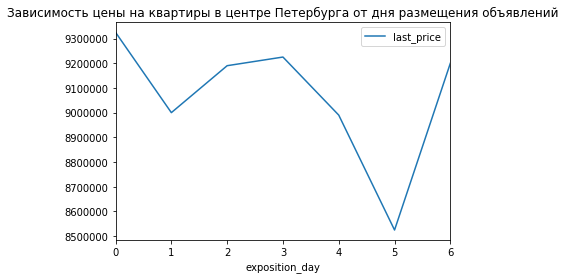

In [ ]:
centre_exposition_day = center_real_estate.pivot_table(index = 'exposition_day', values = 'last_price', aggfunc = ['median', 'mean'])
centre_exposition_day.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены на квартиры в центре Петербурга от дня размещения объявлений')
centre_exposition_day.plot(y = 'median')
plt.title('Зависимость цены на квартиры в центре Петербурга от дня размещения объявлений')
centre_exposition_day



,median,mean
,last_price,last_price
exposition_month,,
1,9900000,1.574588e+07
2,9500000,1.482058e+07
3,9400000,1.443425e+07
4,8875000,1.590093e+07
5,8825000,1.439314e+07
6,8785000,1.419728e+07
7,9040000,1.486899e+07
8,8900000,1.360773e+07


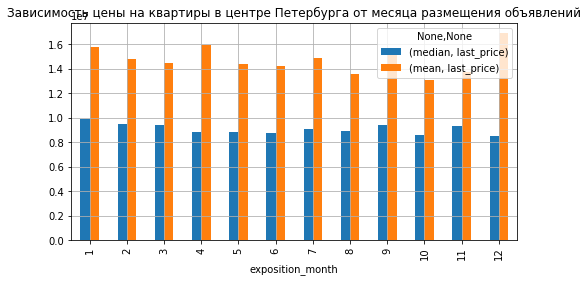

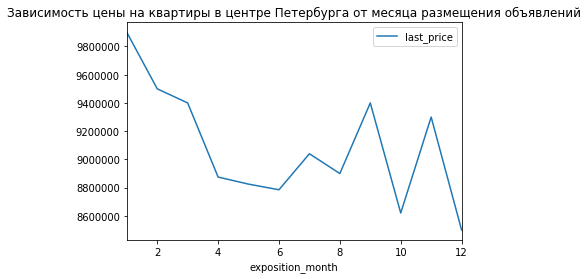

In [ ]:
centre_exposition_month = center_real_estate.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = ['median', 'mean'])
centre_exposition_month.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены на квартиры в центре Петербурга от месяца размещения объявлений')
centre_exposition_month.plot(y = 'median')
plt.title('Зависимость цены на квартиры в центре Петербурга от месяца размещения объявлений')
centre_exposition_month

,median,mean
,last_price,last_price
exposition_year,,
2014,19800000,2.569247e+07
2015,9995000,1.688356e+07
2016,9400000,1.526412e+07
2017,8990000,1.527190e+07
2018,8735840,1.270366e+07
2019,9488000,1.524132e+07


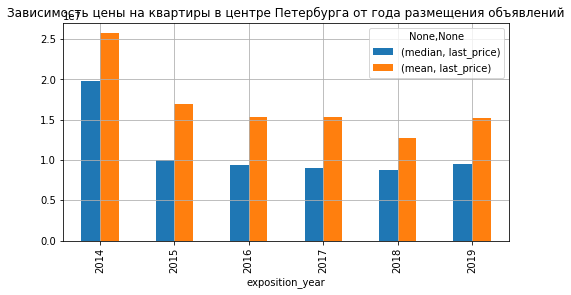

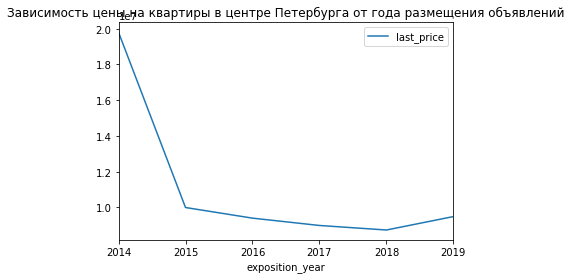

In [ ]:
centre_exposition_year = center_real_estate.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['median', 'mean'])
centre_exposition_year.plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость цены на квартиры в центре Петербурга от года размещения объявлений')
centre_exposition_year.plot(y = 'median')
plt.title('Зависимость цены на квартиры в центре Петербурга от года размещения объявлений')
centre_exposition_year

Существует зависимость цены недвижимости в центре Петербурга от даты размещения объявления: дня недели, месяца и года. Самая дорогая недвижимость размещается в рабочие дни, особенно в понедельник, четверг и в воскресенье (в отличие от объявлений по области), в январе (что очень отличается от тенденции по остальной части города и области). Также мы видим взлеты цен размещаемой недвижимости в сентябре и ноябре, после сезона отпусков. В теплые месяцы рынок проседает, что коррелирует с ситуацией по всей стране. Самые низкие цены наблюдаются по субботам, в июне и октябре. Возможно, такая разница есть потому, что в центре большая часть недвижимости продается под бизнес, а у этого сегмента рынка существуют свои сезонные особенности. По году мы видим такую же зависимость, как и по области.




У нас остались без внимания парки, водоемы и аэропорт. Посмотрим, есть ли зависимость цены на жилье относительно этих параметров для центра города и остальной его части.

In [ ]:
corr_center = center_real_estate[['last_price', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].corr()
corr_center.style.background_gradient(cmap='coolwarm')

,last_price,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
last_price,1,0.0938093,0.109114,-0.0461871,0.104952,-0.0765455
airports_nearest,0.0938093,1,0.00248892,-0.0248763,0.0882964,0.034983
parks_around3000,0.109114,0.00248892,1,-0.290032,0.165391,-0.168619
parks_nearest,-0.0461871,-0.0248763,-0.290032,1,-0.042454,0.0877241
ponds_around3000,0.104952,0.0882964,0.165391,-0.042454,1,-0.375399
ponds_nearest,-0.0765455,0.034983,-0.168619,0.0877241,-0.375399,1


Для центра зависимости нет.

In [ ]:
corr_all = df[['last_price', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].corr()
corr_all.style.background_gradient(cmap='coolwarm')

,last_price,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
last_price,1,-0.0262161,0.198286,-0.0165286,0.209284,-0.0858362
airports_nearest,-0.0262161,1,0.0012335,-0.0713307,-0.0503439,0.0141576
parks_around3000,0.198286,0.0012335,1,-0.25935,0.393467,-0.1692
parks_nearest,-0.0165286,-0.0713307,-0.25935,1,0.0748213,0.00177985
ponds_around3000,0.209284,-0.0503439,0.393467,0.0748213,1,-0.343068
ponds_nearest,-0.0858362,0.0141576,-0.1692,0.00177985,-0.343068,1


Для остальной части города и области есть только очень слабая зависимость цены от наличия водоема в радиусе 3 км. Но она настолько слабая, что ею можно пренебречь.

**Общий вывод:**

---
Первая сложность, с которой мы столкнулись в нашем исследовании - большое количество пропущенных данных. По нашим предположениям имело место их отсутствие по причине незаполнения некоторых категорий продавцами еще на этапе размещения объявления о продаже недвижимости. Например, продавец может не обладать информацией о высоте потолков, жилой площади, или не знает, что такое апартаменты (не считает важным заполнять это поле). Также он мог забыть закрыть объявление после сделки. Эти факторы мы можем отнести к человеческим. Конечно, заполнение абсолютно всех параметров требует затрат времени и усилий. Если заказчик считает, что эти параметры необходимы, он может сделать такие поля обязательными для заполнения на сайте, тогда в последующем мы получим больше данных. Такая позиция также хороша для покупателей: обладая большим количеством информации, проще принять решение, пропустить объявление или связаться с продавцом. 

Что касается машинных ошибок, то мы выявили закономерность: отсутствует одинаковое количество данных, связанных с геолокацией. Это может говорить об ошибке в выгрузке или системном сбое. Возможно, у 23% продавцов было отключено геопозиционирование, и координат попросту нет. Если есть возможность, то следует узнать о причине у заказчика или запросить отсутствующие данные.

Таким образом, профиль средней квартиры, выставленной на продажу в Петербурге и Ленобласти:
общая площадь - 52 кв.м., стоимость 4,6 млн.руб., 2 комнаты, высота потолков 2,65 м. Больше всего недвижимости выставлено на продажу площадью 45 кв.м., стоимостью 4-5 млн.руб., однокомнтаной, с высотой потолков 2,5-2,7 м.
Аномальные значения присутствуют в каждом разделе данных: площадь 900 кв.м., цена 12190 руб или 763 млн.руб. (хотя 900 кв.м. могли бы столько стоить), 19 комнат, 1 м. или 100 м. высота потолков.

Эти цифры говорят о том, что в наших данных не хватает раздела о типе недвижимости. Стоблец is_apartment оказался незаполненным, остальные не расскажут о природе аномалий. Например, если продается чердак, крохотная комната, заброшенный завод для рейв-вечеринок или дворец олигарха, мы бы могли лучше понять, являются ли аномальными некоторые значения. Поэтому, на наш взгляд, на сайте следует добавить заполнение обязательного поля “Тип недвижимости”.

Среднее время продажи недвижимости составляет 95 дней. 3 месяца звучит правдоподобно. Максимальный срок - 4,3 года, может быть связан с тем, что после продажи на сайте не сняли объявление, либо с такими квартирами что-то не в порядке. Конечно, может быть и такое, что "не такую" квартиру никто не захотел покупать. Например, она сильно разбита или продавец указал неадекватно высокую цену. Основная масса объявлений закрывается в течении 200 дней. Заказчику следует обратить внимание на следующие аномалии: необычно быстрая продажа - менее 12 дней, необычно долгая - выше 114 дней. 

При более пристальном рассмотрении значений времени снятия объявлений мы обнаружили  некоторая закономерность: всплески на 45, 60, 7 и 30 дней. Это связано с имеющимися на сервисе Яндекс.Недвижимость сроками публикации и продвижения объявлений.

Мы увидели большое количество объявлений о продаже в первые дни публикации, которое постепенно спадает в зависимости от времени: больше времени прошло - больше объявлений сняли. Это довольно логично, если учитывать, что:

1. за время размещения приходится платить, 
2. часто объявления перехватывают агенты, 
3. хорошая недвижимость долго не простаивает.

Помимо этого, при поимке мошеннической деятельности можно учесть следующие аномалии в параметрах продаваемой недвижимости:

-цены выше 11млн. 870 тыс. руб.,
-общая площадь выше 114 кв.м.,
-больше 6 комнат,
-потолки выше 3, 2 м.

Также мы выяснили, что по городу и области есть интересная зависимость между ценой за квадратный метр и отдаленностью от центра Петербурга: чем дальше от центра, тем дороже. Скорее всего, так получается потому, что существуют элитные загородные районы. Существует слабая взаимосвязь между количеством комнат и конечной ценой на недвижимость. Конечная цена в основном зависит от общей площади недвижимости: чем больше площадь, тем выше цена.
 Выше всего цена квартиры на другом этаже, ниже всего - на первом. Последний этаж имеет среднюю цену.
 
По городу и области существует зависимость цены недвижимости от даты размещения объявления: дня недели, месяца и года. Самая дорогая недвижимость размещается во вторник (в целом выше в рабочие дни), в апреле (перед сезоном отпусков). Самые низкие цены наблюдаются по воскресеньям (за неделю не удалось продать, либо самые серьезные сделки не делаются в выходные), в июне. К весне, после новогодних и гендерных праздников деловая активность на рынке обычно поднимается. Новое снижение количества сделок происходит во время майских праздников и продолжается до лета. Как правило, на летний период рынок недвижимости замирает, а его пик приходится на декабрь, но в нашем исследовании мы рассматриваем нетипичный период, на который пришлись кризисы и изменения по ипотечным ставкам. Мы же видим всплески цен в августе и сентябре.  В 2014 году мы наблюдаем самые высокие цены. В декабре 2014 года банки резко повысили ставки по жилищным кредитам, а затем очень медленно их понижали на протяжении следующих двух лет, что мы видим в снижении цен в 2015. С этого периода и до 2018 платежеспособность населения снижалась, начали происходить политические и экономические процессы, повлиявшие на состояние рынка. Традиционная сезонность, связанная с временем года, в последнее время меняется. Колебания спроса на рынке зависят сейчас сильнее от изменений ставок по ипотеке или нововведений в законодательстве, чем от смены времен года. Летом 2019 традиционно низкий сезон на рынке жилья совпал со вступлением в силу изменений в законодательство о долевом строительстве.

Максимальную стоимость квадратного метра жилья мы выявили в Петербурге (104761.9 руб.), минимальную - в Выборге (58158.32 руб.)

Самую дорогую недвижимость мы выявили в радиусе 7 км. от центра. Есть также всплески цены за квадратный метр в радиусе 20 и 27 км. Очевидно, что это элитные загородные районы.

Также мы выделили некоторые особенности недвижимости в центре Санкт-Петербурга.  Большинство квартир в центре имеют площадь от 56 до 108 кв.м. Средняя общая площадь - 77 кв.м. Цена от 6,5 млн.руб до 14 млн.руб. Средняя цена - 9 млн.руб. Большинство квартир в центре имеют 2-3 комнаты и высоту потолков 2,65 - 3,1 м. Средняя высота потолков - 2,8 м. Таким образом, недвижимость в центре Санкт-Петербурга превосходит недвижимость в остальной части города и области по всем указанным параметрам: по конечной цене в 1,9 раз, по площади в 1,4 раза, по количеству комнат в 1,5 раз, по высоте потолков в 1,05 раз.

Мы нашли зависимость между стоимостью квартиры в центре и общей площадью, но стоимость квадратного метра в центре не зависит от площади, количества комнат и высоты потолков. Квартиры на первом этаже имеют самую низкую конечную стоимость, на последнем - самую высокую.Но если смотреть на цену квадратного метра, то самые дорогие квартиры на другом этаже.

Существует зависимость цены недвижимости в центре Петербурга от даты размещения объявления: дня недели, месяца и года. Самая дорогая недвижимость размещается в рабочие дни, особенно в понедельник, четверг и в воскресенье (в отличие от объявлений по области), в январе (что очень отличается от тенденции по остальной части города и области). Также мы видим взлеты цен размещаемой недвижимости в сентябре и ноябре, после сезона отпусков. В теплые месяцы рынок проседает, что коррелирует с ситуацией по всей стране. Самые низкие цены наблюдаются по субботам, в июне и октябре. Возможно, такая разница есть потому, что в центре большая часть недвижимости продается под бизнес, а у этого сегмента рынка существуют свои сезонные особенности. По году мы видим такую же зависимость, как и по области.

Мы не нашли зависимости цены на жилье относительно близости парков, водоемов и аэропорта для всех частей города.

Таким образом, для определения рыночной стоимости объектов недвижимости важны следующие параметры:
общая площадь, 
расстояние до центра города,
число комнат,  
этаж квартиры,
срок продажи квартиры.


